# Figure 3. Illustration of contour normalization

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import music21

import sys
sys.path.append('../')
from src.contours import extract_phrases_from_file
from src.contours import interpolate_stream
from helpers import cm2inch

matplotlib.style.use('styles.mplstyle')
copyright = '(c) Bas Cornelissen (CC BY 4.0 licence)'

In [2]:
def show_phrase(phrase, ys, show_legend=True, height=1):
    # Extract note durations etc
    notes = phrase.recurse().notes
    offsets = [float(n.offset) for n in notes]
    pitches = [n.pitch.ps for n in notes]
    durations = [n.quarterLength for n in notes]

    # Get normalized contour
    xs = np.linspace(0, 1, 50)
    norm_ys = ys - np.mean(ys)

    # Plot Piano roll
    total_duration = phrase.quarterLength
    for offset, duration, pitch in zip(offsets, durations, pitches):
        bottom_left = (offset/total_duration, pitch - np.mean(ys) - height/2)
        rect = patches.Rectangle(bottom_left, duration/total_duration - 0.01, height,
                                 facecolor='r', alpha=.4, label='note')
        plt.gca().add_patch(rect)

    plt.plot(xs, norm_ys, 'k.--', lw=.3, ms=1, label='normalized contour')
    plt.xlim(-.05, 1.05)
    plt.plot([-.05,1.05], [0,0], 'k:', lw=.5)
    
    plt.ylabel('normalized pitch')
    plt.xlabel('position in phrase')

    if show_legend:
        # Legend: don't repeat labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        
# fig = plt.figure(figsize=cm2inch(6, 3), constrained_layout=True)
# matplotlib.style.use('styles.mplstyle')
# show_phrase(phrase, ys, show_legend=True)
# plt.savefig('test3.pdf', pad_inches=0)

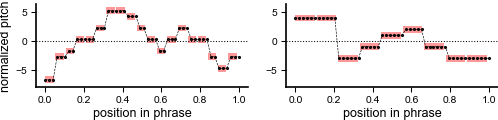

In [3]:
# Show a phrase from an antiphon
filepath = '../datasets/gregobasecorpus/gabc/02238.gabc'
phrases = extract_phrases_from_file(filepath)

fig = plt.figure(figsize=cm2inch(9, 2.5))
ax1 = plt.subplot(121)
phrase1 = phrases[0]
pitches1 = interpolate_stream(phrase1)
show_phrase(phrase1, pitches1, show_legend=False, height=1.2)
plt.title(None)
plt.ylim(-8,6.5)

ax2 = plt.subplot(122, sharey=ax1)
phrase2 = phrases[1]
pitches2 = interpolate_stream(phrase2)
show_phrase(phrase2, pitches2, show_legend=False, height=1.2)
# ax2.set_yticklabels([])
plt.ylabel('')

plt.tight_layout()
plt.savefig('../figures/fig03/fig03-normalized-contour-alma-2-phrases.pdf')